Load the mnist Dataset

In [ ]:
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

Analyze the Data


In [ ]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes )

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Look at the images in dataset

Text(0.5, 1.0, 'Ground Truth : 1')

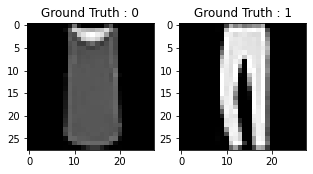

In [ ]:
plt.figure(figsize=[5,5])
# display first image in training data
plt.subplot(121)
plt.imshow(train_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[2]))
# display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[2,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[2]))

Data Preprocessing

In [ ]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

One hot encoding

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Origintal label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Origintal label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape, valid_X.shape, train_label.shape, valid_label.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


Model the Data

In [ ]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU 

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

Compile the Model

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

Train the Model

In [ ]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 86s 114ms/step - loss: 0.4622 - accuracy: 0.8321 - val_loss: 0.3231 - val_accuracy: 0.8787
Epoch 2/20
750/750 [==============================] - 85s 114ms/step - loss: 0.2853 - accuracy: 0.8947 - val_loss: 0.2740 - val_accuracy: 0.9011
Epoch 3/20
750/750 [==============================] - 85s 114ms/step - loss: 0.2407 - accuracy: 0.9117 - val_loss: 0.2537 - val_accuracy: 0.9081
Epoch 4/20
750/750 [==============================] - 85s 114ms/step - loss: 0.2101 - accuracy: 0.9220 - val_loss: 0.2467 - val_accuracy: 0.9092
Epoch 5/20
750/750 [==============================] - 86s 114ms/step - loss: 0.1852 - accuracy: 0.9305 - val_loss: 0.2464 - val_accuracy: 0.9089
Epoch 6/20
750/750 [==============================] - 85s 114ms/step - loss: 0.1647 - accuracy: 0.9385 - val_loss: 0.2448 - val_accuracy: 0.9093
Epoch 7/20
750/750 [==============================] - 85s 114ms/step - loss: 0.1411 - accuracy: 0.9480 - val_loss: 0.2512 - val_ac

Model Evalution on the Test Set

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5103289484977722
Test accuracy: 0.9147999882698059


In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 90s 120ms/step - loss: 0.5983 - accuracy: 0.7781 - val_loss: 0.3622 - val_accuracy: 0.8663
Epoch 2/20
750/750 [==============================] - 89s 119ms/step - loss: 0.3673 - accuracy: 0.8659 - val_loss: 0.3039 - val_accuracy: 0.8879
Epoch 3/20
750/750 [==============================] - 90s 120ms/step - loss: 0.3241 - accuracy: 0.8798 - val_loss: 0.2840 - val_accuracy: 0.8967
Epoch 4/20
750/750 [==============================] - 90s 121ms/step - loss: 0.2974 - accuracy: 0.8907 - val_loss: 0.2942 - val_accuracy: 0.8872
Epoch 5/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2797 - accuracy: 0.8966 - val_loss: 0.2466 - val_accuracy: 0.9122
Epoch 6/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2630 - accuracy: 0.9013 - val_loss: 0.2391 - val_accuracy: 0.9140
Epoch 7/20
750/750 [==============================] - 90s 120ms/step - loss: 0.2526 - accuracy: 0.9059 - val_loss: 0.2418 - val_ac

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


Model Evalutaion on the test set

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 6s 18ms/step - loss: 0.2222 - accuracy: 0.9194


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22223788499832153
Test accuracy: 0.9193999767303467


In [ ]:
predicted_classes = fashion_model.predict(test_X)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9164 correct labels


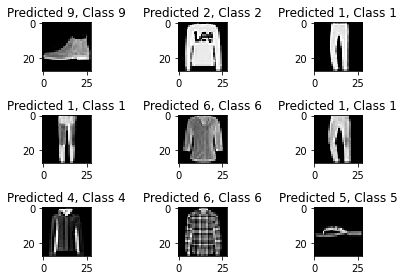

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 836 incorrect labels


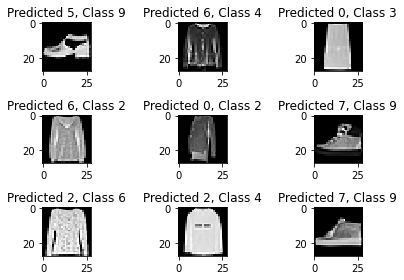

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.91      0.93      0.92      1000
     Class 4       0.91      0.82      0.86      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.81      0.71      0.76      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

